# **1.1. IMPORTING DATASET**

In [163]:
import pandas as pd

In [164]:
ds=pd.read_csv(r"Crude_Oil_Prices.csv")

In [165]:
ds.shape

(9315, 2)

In [166]:
ds.head

<bound method NDFrame.head of             Date  Value
0     02-01-1986  25.56
1     03-01-1986  26.00
2     06-01-1986  26.53
3     07-01-1986  25.85
4     08-01-1986  25.87
...          ...    ...
9310  12-11-2022    NaN
9311  13-11-2022    NaN
9312  14-11-2022    NaN
9313  15-11-2022    NaN
9314  16-11-2022    NaN

[9315 rows x 2 columns]>

# **1.2. IMPORTING LIBRARIES**

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **1.3. HANDLING_MISSING_VALUES**

In [168]:
ds.isnull().sum()


Date      0
Value    21
dtype: int64

In [169]:
hd=ds.dropna()
print(hd)

            Date  Value
0     02-01-1986  25.56
1     03-01-1986  26.00
2     06-01-1986  26.53
3     07-01-1986  25.85
4     08-01-1986  25.87
...          ...    ...
9289  20-10-2022  85.98
9290  21-10-2022  85.05
9291  24-10-2022  84.92
9292  25-10-2022  84.79
9293  26-10-2022  88.05

[9294 rows x 2 columns]


In [170]:
hd.isnull().sum()

Date     0
Value    0
dtype: int64

# **1.4. FEATURE_SCALING**

In [171]:
from sklearn import preprocessing

In [172]:
prepro = hd.iloc[:, 1:2].values
print ("\nOriginal data values : \n",  prepro)


Original data values : 
 [[25.56]
 [26.  ]
 [26.53]
 ...
 [84.92]
 [84.79]
 [88.05]]


In [173]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(prepro)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.11335703]
 [0.11661484]
 [0.12053902]
 ...
 [0.55286539]
 [0.55190286]
 [0.57604028]]


In [174]:
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(prepro)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[-0.68979433]
 [-0.67488539]
 [-0.65692689]
 ...
 [ 1.32155776]
 [ 1.31715284]
 [ 1.42761456]]


In [175]:
data = x_after_min_max_scaler

# **1.5. DATA_VISUALIZATION**

In [176]:
def strtodate(inp):
  import datetime
  return(datetime.datetime.strptime(inp,'%d-%m-%Y'))

hd.Date=hd.Date.apply(strtodate)
print(hd.Date)

0      1986-01-02
1      1986-01-03
2      1986-01-06
3      1986-01-07
4      1986-01-08
          ...    
9289   2022-10-20
9290   2022-10-21
9291   2022-10-24
9292   2022-10-25
9293   2022-10-26
Name: Date, Length: 9294, dtype: datetime64[ns]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [177]:
DF = pd.DataFrame()
DF['value'] = hd.Value
DF = DF.set_index(hd.Date)
DF

,value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2022-10-20,85.98
2022-10-21,85.05
2022-10-24,84.92


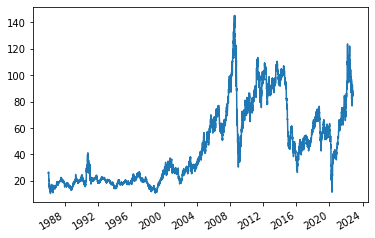

In [178]:
plt.plot(DF)
plt.gcf().autofmt_xdate()
plt.show()

# **1.6. SPLITTING_DATA_INTO_TRAINING_DATA_AND_TESTING_DATA**

In [179]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [180]:
training_size,test_size

(6041, 3253)

In [181]:
train_data,test_data

(array([[0.11335703],
        [0.11661484],
        [0.12053902],
        ...,
        [0.47119799],
        [0.46157263],
        [0.44735673]]), array([[0.4463942 ],
        [0.4413594 ],
        [0.43854583],
        ...,
        [0.55286539],
        [0.55190286],
        [0.57604028]]))

In [182]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [183]:
train_data.shape

(6041, 1)

In [184]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [191]:
x_train.shape,x_test.shape

((6030, 10, 1), (3242, 10, 1))

In [185]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [190]:
x_train.shape,x_test.shape

((6030, 10, 1), (3242, 10, 1))